In [282]:
import keras_ocr
import matplotlib.pyplot as plt
import tensorflow as tf # 2.14.0
import cv2
import img_preprocess
import os

# 1075

In [283]:
detector = keras_ocr.detection.Detector(weights='clovaai_general')
pathFile = 'documenti/C.I. LUCIANA CAMPILII_SCALA A1_INTERNO 03/0004.jpg'

Looking for /Users/gmarini/.keras-ocr/craft_mlt_25k.h5


1/1 [==============================] - 9s 9s/step


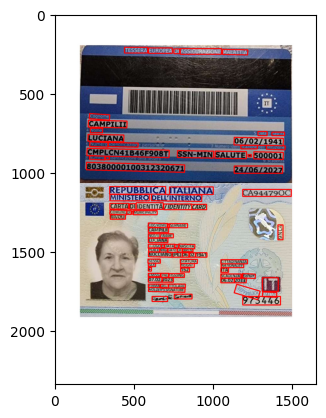

In [284]:
# Original Image -> label Detector

image_original = keras_ocr.tools.read(pathFile)

boxes_orignial = detector.detect(images=[image_original])[0]

drawn = keras_ocr.tools.drawBoxes(image=image_original, boxes=boxes_orignial)

plt.imshow(drawn)

In [285]:
# Controlla numero file presenti nella cartella per nome file da salvare (numero)
# (es. img_1.png, img_2.png, ...)

directoryDataset = 'image_dataset'

lista_file = os.listdir(directoryDataset)

numero_immagini_presenti = len(lista_file)

print(numero_immagini_presenti)


943


Incremento contrasto: 1.2%
####################### PROSSIMA IMMAGINE #########################################################
Incremento contrasto: 1.2%
####################### PROSSIMA IMMAGINE #########################################################
Incremento contrasto: 1.2%
####################### PROSSIMA IMMAGINE #########################################################
Incremento contrasto: 1.2%
####################### PROSSIMA IMMAGINE #########################################################
Rotazione immagine: 1°
Incremento contrasto: 1.2%
####################### PROSSIMA IMMAGINE #########################################################
Rotazione immagine: 2°
Incremento contrasto: 1.2%
####################### PROSSIMA IMMAGINE #########################################################
Rotazione immagine: 1°
####################### PROSSIMA IMMAGINE #########################################################
####################### PROSSIMA IMMAGINE ###########################

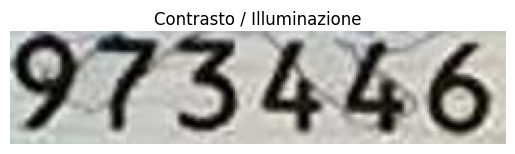

In [286]:
for idx,box in enumerate(boxes_orignial) :

    # print("Numero immagine:", idx)

    # Trasforma arrai in INT
    box = box.astype('int64')
    # Ritaglia bounding-box corrente da immagine...
    parola_cropped = image_original[box[0][1]:box[2][1], box[0][0]:box[2][0] ]    

    # Per renderla formato giusto per funzioni
    cv2.imwrite("temp.png", parola_cropped)
    img_cropped = cv2.imread('temp.png')
    plt.axis('off')
    plt.title('Originale')
    plt.imshow(img_cropped)
    # plt.show()

    # Addrizza immagine
    imagine_addrizzata = img_preprocess.addrizzaImmagine(box, img_cropped)
    cv2.imwrite("temp_addrizza.png", imagine_addrizzata)
    imagine_addrizzata = cv2.imread('temp_addrizza.png')
    plt.axis('off')
    plt.title('Addrizzata')
    plt.imshow(imagine_addrizzata)
    # plt.show()

    # Regola contrasto e luminosità
    imagine_elaborata = img_preprocess.aggiustaContrasto(imagine_addrizzata)
    cv2.imwrite("temp_contrastoLuminosita.png", imagine_elaborata)
    imagine_elaborata = cv2.imread('temp_contrastoLuminosita.png')
    plt.axis('off')
    plt.title('Contrasto / Illuminazione')
    plt.imshow(imagine_elaborata)
    # plt.show()

    # SALVA IMMAGINE IN CARTELLA -> 'image_dataset'
    cv2.imwrite(f'image_dataset/img_{numero_immagini_presenti+idx+1}.png', imagine_elaborata)
    
    print("####################### PROSSIMA IMMAGINE #########################################################")